In [2]:
import numpy as np

embedding_matrix = np.load('embedding_matrix.npy', allow_pickle=True)
embedding_matrix.shape

(296251, 128)

In [3]:
import pickle

with open('ids.pkl', 'rb') as ids_bin:
    ids = pickle.loads(ids_bin.read())

In [7]:
import hdbscan

hbds_model = hdbscan.HDBSCAN(min_samples=1, cluster_selection_epsilon=0.01).fit(embedding_matrix)

In [ ]:
1+1

In [8]:
import pandas as pd

hbds_scan_labels = hbds_model.labels_
df = pd.DataFrame(zip(ids, hbds_scan_labels), columns = ['node_ids', 'hdbscan'])
df

,node_ids,hdbscan
0,0x213e4c9cbdc6112468aa6541674ac9b2d883d1ac,1
1,0x2c389165c3a0a61e259085c2d147a17bacfb55a2,1
2,0x875ebe92e4bcc8471db1707d749d06729aec12d4,1
3,0xca04ec8de1ebec40756fbd481b54aa5d773ff52b,1
4,0xe3fbf80f9a8f69f68f09a87a4f10f9a5f7ccc973,1
...,...,...
296246,0x1b412d11e1617d1babc0975cafa7133c1b61359f,1
296247,0xe4f9db5772388779e726c91e57a51281d54a538e,1
296248,0x0150a68730a70825180985c302c3b8296bccb1ea,1
296249,0x3e86f2826355e4b03eb80bb97ec3feebcfd2f6d4,1


In [10]:
df.hdbscan.value_counts()

 1    290093
-1      6148
 2         5
 0         5
Name: hdbscan, dtype: int64

In [11]:
import umap

embeddings_reduced = umap.UMAP(n_components=2, low_memory=True).fit(embedding_matrix)

/Users/mvbattan/Library/Caches/pypoetry/virtualenvs/pow_a_pos-zip6Mt8u-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-05 13:05:48.846734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
nodes_labels = df

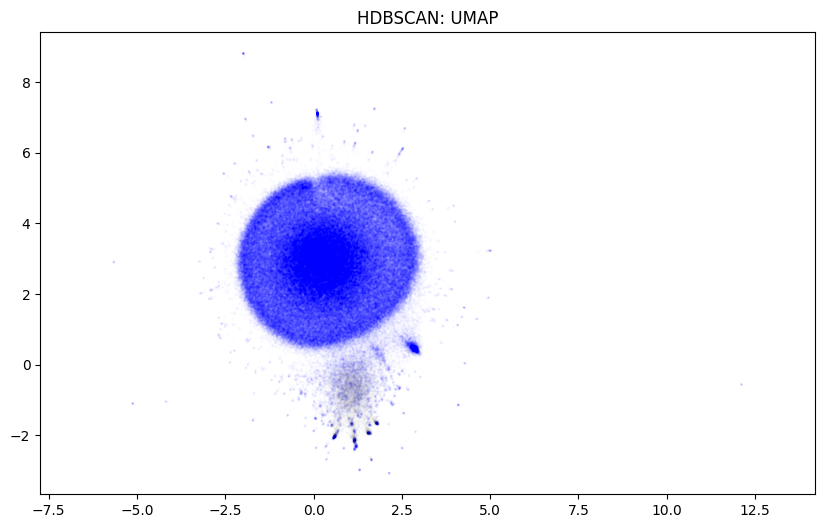

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(
    embeddings_reduced.embedding_[:, 0],
    embeddings_reduced.embedding_[:, 1],
    alpha=0.01,
    c=[['red', 'blue', 'green', 'gray'][i] for i in df.hdbscan],
    s=1
)

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'HDBSCAN: UMAP')
plt.savefig('hdbscan_umap.png')

In [24]:
hbds_model_2 = hdbscan.HDBSCAN(min_samples=3).fit(embedding_matrix)

In [25]:
hbds_scan_labels = hbds_model_2.labels_
df_2 = pd.DataFrame(zip(ids, hbds_scan_labels), columns = ['node_ids', 'hdbscan'])
df_2

,node_ids,hdbscan
0,0x213e4c9cbdc6112468aa6541674ac9b2d883d1ac,1
1,0x2c389165c3a0a61e259085c2d147a17bacfb55a2,1
2,0x875ebe92e4bcc8471db1707d749d06729aec12d4,1
3,0xca04ec8de1ebec40756fbd481b54aa5d773ff52b,1
4,0xe3fbf80f9a8f69f68f09a87a4f10f9a5f7ccc973,1
...,...,...
296246,0x1b412d11e1617d1babc0975cafa7133c1b61359f,1
296247,0xe4f9db5772388779e726c91e57a51281d54a538e,1
296248,0x0150a68730a70825180985c302c3b8296bccb1ea,1
296249,0x3e86f2826355e4b03eb80bb97ec3feebcfd2f6d4,1


In [27]:
df_2.hdbscan.value_counts()

 1    290001
-1      6240
 2         5
 0         5
Name: hdbscan, dtype: int64

In [30]:
embeddings_reduced.embedding_

array([[ 0.37105757,  4.9452868 ],
       [ 2.820072  ,  4.1930127 ],
       [ 0.4058273 ,  5.283232  ],
       ...,
       [-0.18396936,  4.3733397 ],
       [ 0.59680086,  2.876916  ],
       [ 0.4963619 ,  3.9946108 ]], dtype=float32)

In [43]:
hbds_model_reduced = hdbscan.HDBSCAN(min_samples=1, cluster_selection_epsilon=0.01).fit(embeddings_reduced.embedding_)

In [44]:
hbds_scan_labels = hbds_model_reduced.labels_
df_reduced = pd.DataFrame(zip(ids, hbds_scan_labels), columns = ['node_ids', 'hdbscan'])
df_reduced

,node_ids,hdbscan
0,0x213e4c9cbdc6112468aa6541674ac9b2d883d1ac,2535
1,0x2c389165c3a0a61e259085c2d147a17bacfb55a2,-1
2,0x875ebe92e4bcc8471db1707d749d06729aec12d4,4020
3,0xca04ec8de1ebec40756fbd481b54aa5d773ff52b,2126
4,0xe3fbf80f9a8f69f68f09a87a4f10f9a5f7ccc973,844
...,...,...
296246,0x1b412d11e1617d1babc0975cafa7133c1b61359f,5861
296247,0xe4f9db5772388779e726c91e57a51281d54a538e,6839
296248,0x0150a68730a70825180985c302c3b8296bccb1ea,2524
296249,0x3e86f2826355e4b03eb80bb97ec3feebcfd2f6d4,6989


In [45]:
df_reduced.hdbscan.value_counts()

 6989    109234
-1        15509
 5937      2204
 711       2029
 6244      1883
          ...  
 5088         5
 2076         5
 946          5
 148          5
 1515         5
Name: hdbscan, Length: 6991, dtype: int64

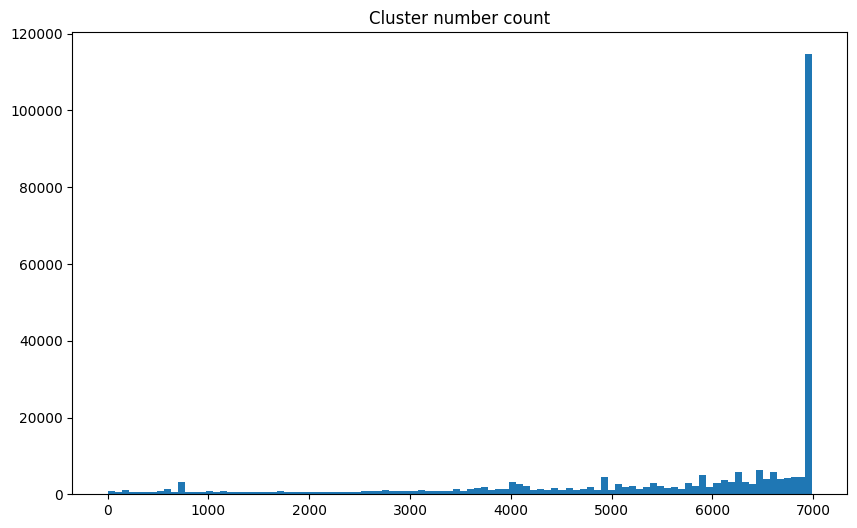

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df_reduced[df_reduced.hdbscan != -1].hdbscan.values, bins=100)
plt.title('Cluster number count')
plt.show()

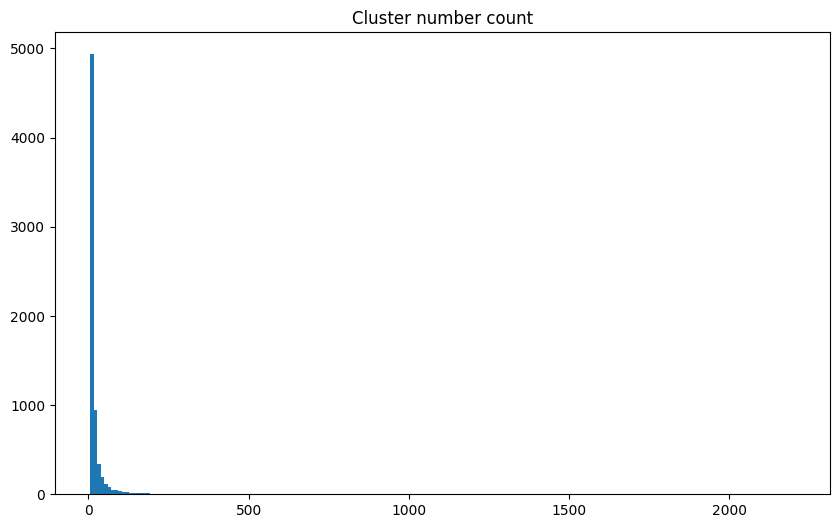

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_reduced[(df_reduced.hdbscan != -1) & (df_reduced.hdbscan != 6989)].hdbscan.value_counts().values, bins=200)
plt.title('Cluster number count')
plt.show()

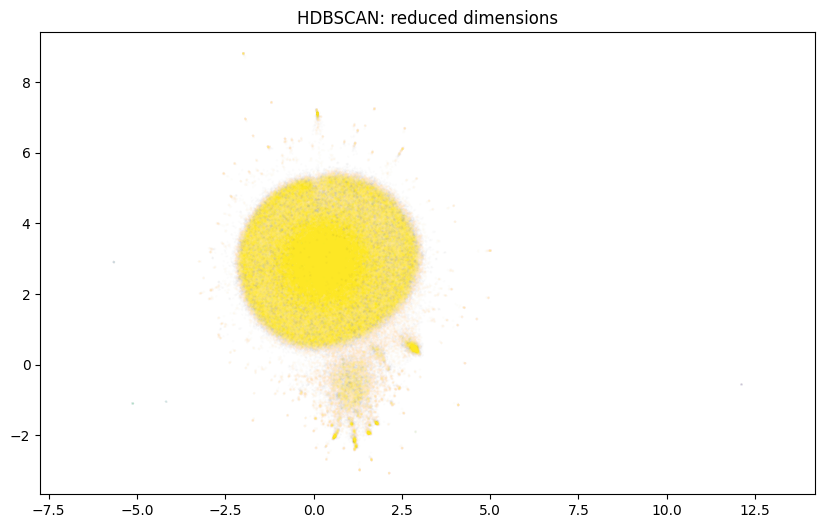

In [47]:
import matplotlib.colors as colors
plt.figure(figsize=(10, 6))

method = 'reduced dimensions'

cmap_colors = ['gray'] + [colors.to_hex(plt.cm.viridis(i)) for i in range(len(nodes_labels.hdbscan) - 1)]

cmap = colors.ListedColormap(cmap_colors)

plt.scatter(
    embeddings_reduced.embedding_[:, 0],
    embeddings_reduced.embedding_[:, 1],
    alpha=0.01,
    s=1,
    c=df_reduced.hdbscan,
    cmap=cmap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'HDBSCAN: {method}')
plt.savefig(f'hdbscan_{method}.png')

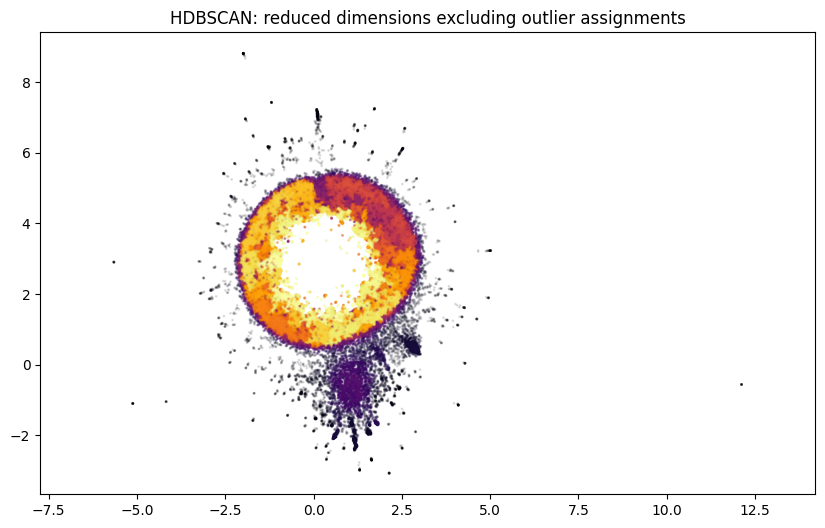

In [57]:
plt.figure(figsize=(10, 6))

method = 'reduced dimensions excluding outlier assignments'

cmap_colors = ['gray'] + [colors.to_hex(plt.cm.viridis(i)) for i in range(len(nodes_labels.hdbscan) - 1)]

cmap = colors.ListedColormap(cmap_colors)

plt.scatter(
    embeddings_reduced.embedding_[(df_reduced.hdbscan != -1) & (df_reduced.hdbscan != 6989)][:, 0],
    embeddings_reduced.embedding_[(df_reduced.hdbscan != -1) & (df_reduced.hdbscan != 6989)][:, 1],
    alpha=0.1,
    s=1,
    c=df_reduced[(df_reduced.hdbscan != -1) & (df_reduced.hdbscan != 6989)].hdbscan,
    cmap='inferno'
)

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'HDBSCAN: {method}')
plt.savefig(f'hdbscan_{method}.png')

In [9]:
df.to_csv('pow_hdbscan.csv', index=False)

In [53]:
df_reduced.to_csv('pow_umap_hdbscan.csv', index=False)